# Distribuciones de Datos.

## Introducción

- Breve descripción de la importancia de entender las distribuciones de datos cuantitativos.
- Mencionar que se utilizarán gráficos de puntos, histogramas y curvas de distribución para explicar los conceptos.
- Código para generar los datos de ejemplo:

In [1]:
import pandas as pd
import numpy as np

np.random.seed(0)

n = 100
id = range(1, n + 1)
# https://www.eltiempo.com/archivo/documento/CMS-13128617
height = np.random.normal(172, 8, n)
# Body mass index (BMI)
# https://en.wikipedia.org/wiki/Body_mass_index
# weight = BMI * height^2
bmi = 26 + np.random.normal(0, 2.5, n)
weight = bmi * ((height/100) ** 2)
commute_time = np.random.uniform(15, 60, n)

data = pd.DataFrame({'ID': id, 'Height': height, 'Weight': weight, 'BMI': bmi})
data.sort_values(by=['Height'],inplace=True,ignore_index=True)

## Datos superpuestos y gráficos de puntos

- Explicar el problema de los datos superpuestos al visualizar una variable cuantitativa.
- Introducir los gráficos de puntos como una solución inicial.
- Código para generar un gráfico de puntos con datos superpuestos:

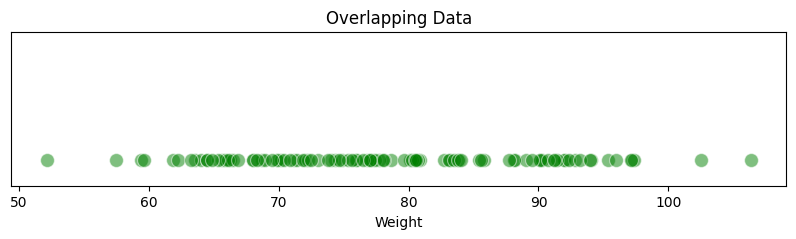

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 2))
sns.scatterplot(x=data['Weight'], y=np.zeros(n), s=100, color="green", alpha=0.5, marker='o', legend=False)
plt.yticks([])
plt.xlabel("Weight")
plt.title("Overlapping Data")
plt.ylim(-1, 5)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

## Agrupando datos en histogramas

- Explicar cómo los histogramas solucionan el problema de los datos superpuestos al agrupar los datos en intervalos o "bins".
- Mostrar la transición de un gráfico de puntos a un histograma.
-Código para generar un gráfico de puntos agrupado y su histograma correspondiente:

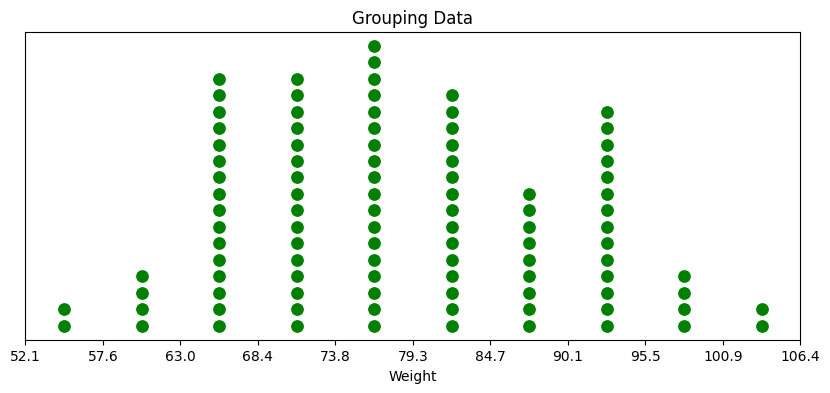

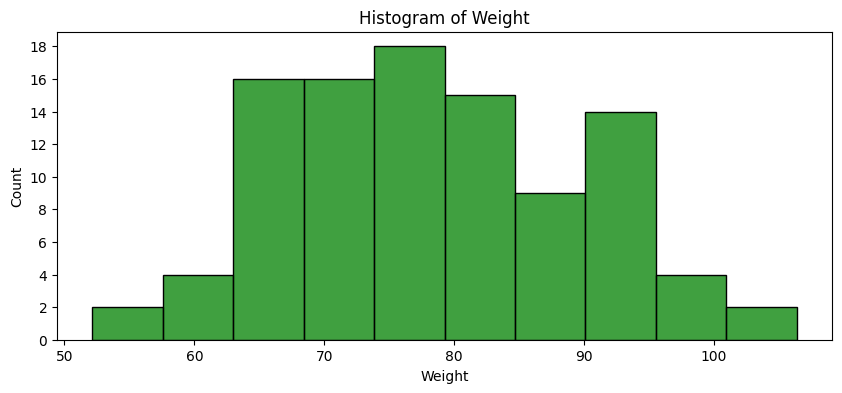

In [3]:
bin_count = 10
counts, bin_edges = np.histogram(data['Weight'], bins=bin_count)
hist_data = pd.DataFrame()

for i in range(bin_count):
    bin_center = (bin_edges[i] + bin_edges[i + 1]) / 2
    bin_data = pd.DataFrame({'x': [bin_center] * counts[i], 'y': range(counts[i])})
    hist_data = pd.concat([hist_data, bin_data], ignore_index=True)

plt.figure(figsize=(10, 4))
sns.scatterplot(x=hist_data['x'], y=hist_data['y'], s=100, color="green", marker='o', legend=False)

plt.xlabel("Weight")
plt.title("Grouping Data")
plt.xticks(ticks=bin_edges, labels=np.round(bin_edges, 1))
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=bin_count, color="green")
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight")
plt.show()

## Distribuciones y curvas de distribución

- Explicar cómo los histogramas revelan la distribución subyacente de los datos.
- Introducir las curvas de distribución como una forma de modelar y visualizar distribuciones.
- Código para generar un histograma con su curva de distribución correspondiente:

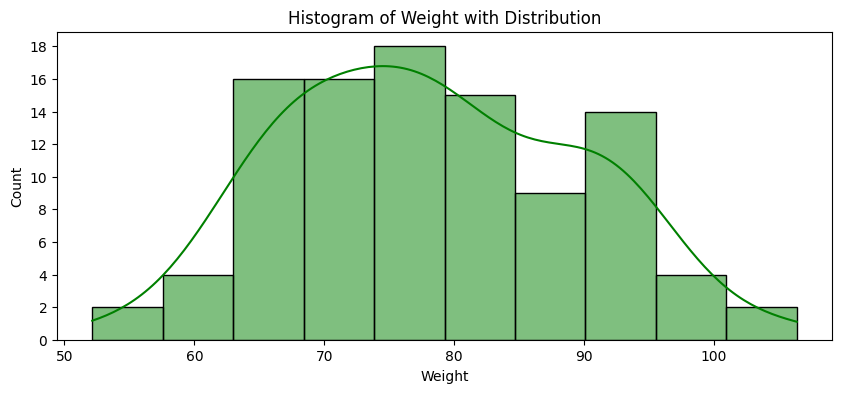

In [4]:
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=bin_count, color="green", kde=True)
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Distribution")
plt.show()

## Formas de distribución

- Describir las formas comunes de distribución: simétrica, asimétrica a la izquierda, asimétrica a la derecha, bimodal y uniforme.
- Utilizar histogramas para ilustrar cada forma de distribución.
- Código para generar los histogramas de diferentes formas:

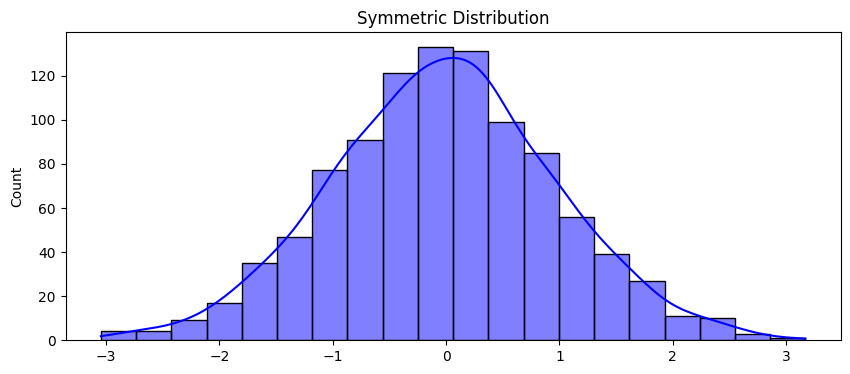

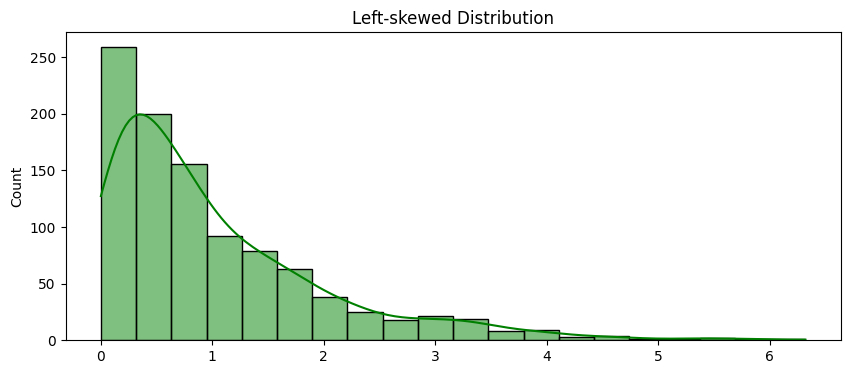

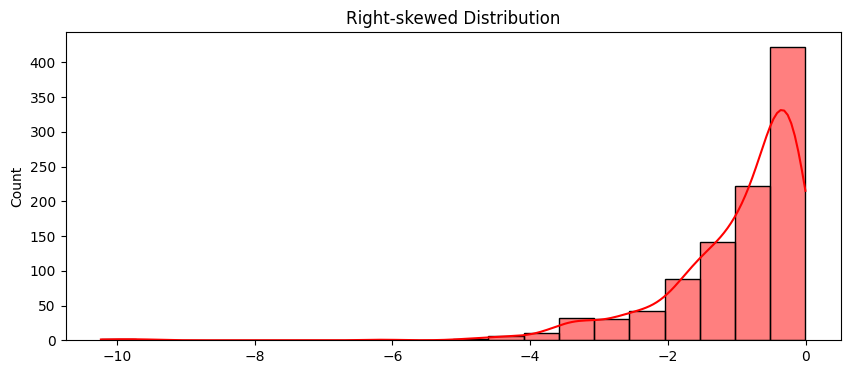

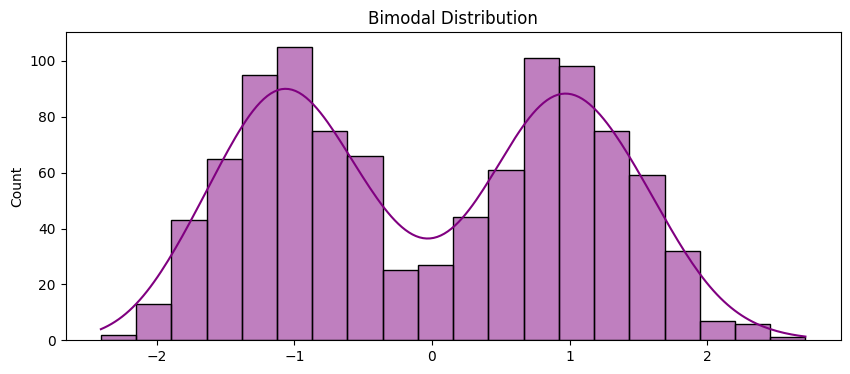

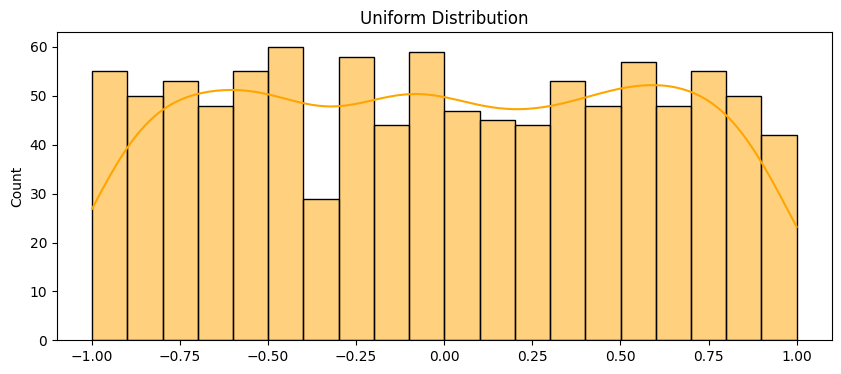

In [5]:
# Generar histogramas de diferentes formas de distribución
# Simétrica
plt.figure(figsize=(10, 4))
sns.histplot(np.random.normal(0, 1, 1000), bins=20, color="blue", kde=True)
plt.title("Symmetric Distribution")
plt.show()

# Asimétrica a la izquierda
plt.figure(figsize=(10, 4))
sns.histplot(np.random.exponential(1, 1000), bins=20, color="green", kde=True)
plt.title("Left-skewed Distribution")
plt.show()

# Asimétrica a la derecha
plt.figure(figsize=(10, 4))
sns.histplot(-np.random.exponential(1, 1000), bins=20, color="red", kde=True)
plt.title("Right-skewed Distribution")
plt.show()

# Bimodal
plt.figure(figsize=(10, 4))
sns.histplot(np.concatenate((np.random.normal(-1, 0.5, 500), np.random.normal(1, 0.5, 500))), bins=20, color="purple", kde=True)
plt.title("Bimodal Distribution")
plt.show()

# Uniforme
plt.figure(figsize=(10, 4))
sns.histplot(np.random.uniform(-1, 1, 1000), bins=20, color="orange", kde=True)
plt.title("Uniform Distribution")
plt.show()

## Medidas de tendencia central

- Explicar la media y la mediana como medidas de tendencia central.
- Mostrar cómo calcular estas medidas en la distribución de ejemplo.
- Código para calcular y mostrar la media y la mediana:

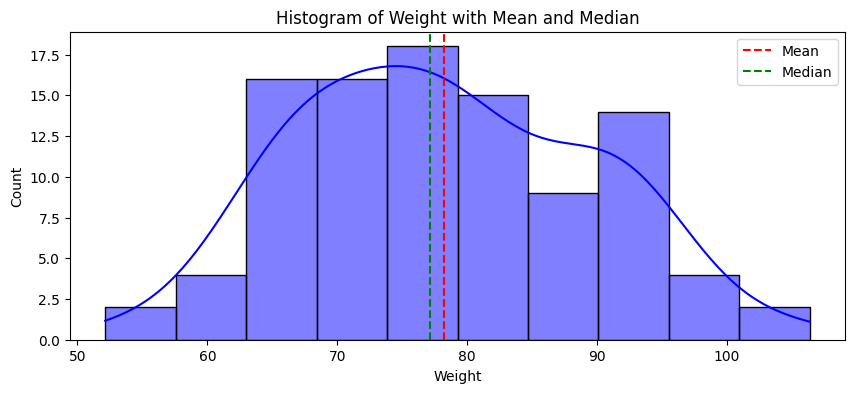

In [6]:
mean_weight = data['Weight'].mean()
median_weight = data['Weight'].median()

plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=10, color="blue", kde=True)
plt.axvline(mean_weight, color='red', linestyle='--', label='Mean')
plt.axvline(median_weight, color='green', linestyle='--', label='Median')
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Mean and Median")
plt.legend()
plt.show()

## Medidas de dispersión

- Explicar el rango, el rango intercuartil, la desviación media absoluta y la desviación estándar como medidas de dispersión.
- Mostrar cómo calcular estas medidas en la distribución de ejemplo.
- Código para calcular y mostrar las medidas de dispersión:

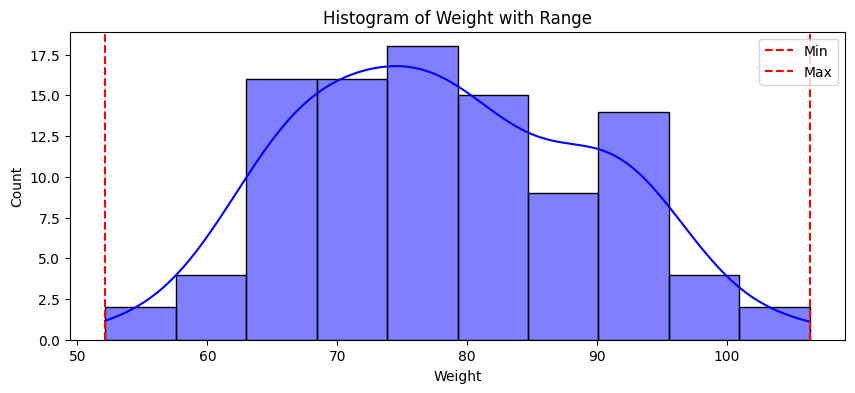

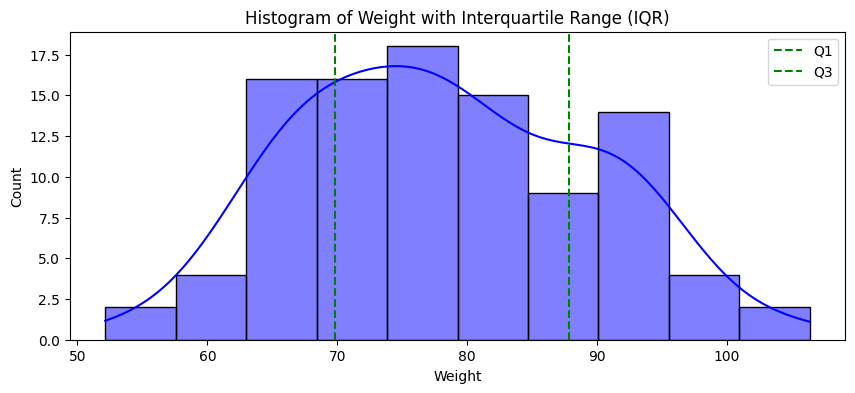

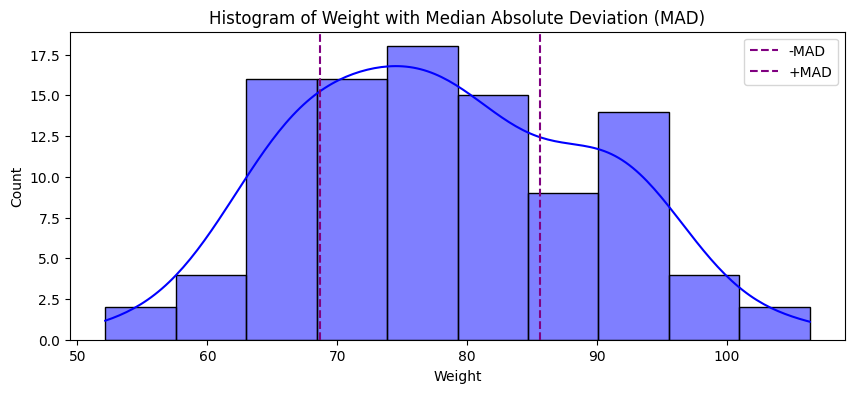

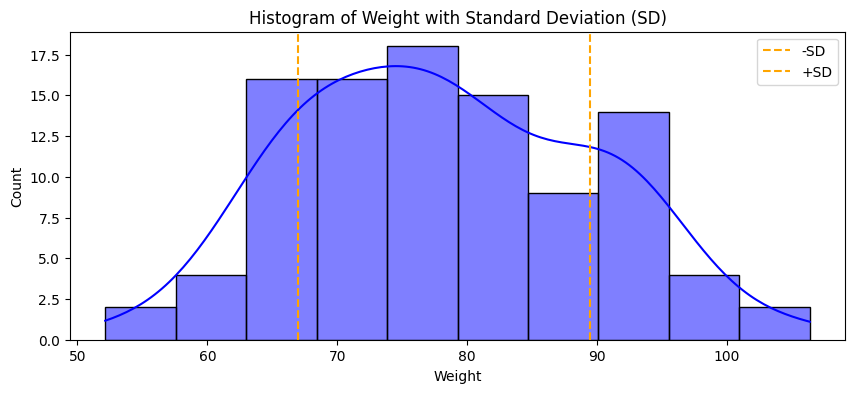

Range: 54.22470118545312
Interquartile Range (IQR): 18.043485124413266
Median Absolute Deviation (MAD): 8.444620534602556
Standard Deviation (SD): 11.206617894471286


In [7]:
from scipy.stats import median_abs_deviation

# Range
plt.figure(figsize=(10, 4))
sns.histplot(data['Weight'], bins=10, color="blue", kde=True)
min_weight = data['Weight'].min()
max_weight = data['Weight'].max()
range_weight = max_weight - min_weight
plt.axvline(min_weight, color='red', linestyle='--', label='Min')
plt.axvline(max_weight, color='red', linestyle='--', label='Max')
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Range")
plt.legend()
plt.show()

# Interquartile Range (IQR)
plt.figure(figsize=(10, 4))
sns.histplot(data['Weight'], bins=10, color="blue", kde=True)
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1
plt.axvline(Q1, color='green', linestyle='--', label='Q1')
plt.axvline(Q3, color='green', linestyle='--', label='Q3')
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Interquartile Range (IQR)")
plt.legend()
plt.show()

# Median Absolute Deviation (MAD)
plt.figure(figsize=(10, 4))
sns.histplot(data['Weight'], bins=10, color="blue", kde=True)
median_absolute_deviation = median_abs_deviation(data['Weight'])
plt.axvline(data['Weight'].median() - median_absolute_deviation, color='purple', linestyle='--', label='-MAD')
plt.axvline(data['Weight'].median() + median_absolute_deviation, color='purple', linestyle='--', label='+MAD')
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Median Absolute Deviation (MAD)")
plt.legend()
plt.show()

# Standard Deviation (SD)
plt.figure(figsize=(10, 4))
sns.histplot(data['Weight'], bins=10, color="blue", kde=True)
standard_deviation = data['Weight'].std()
plt.axvline(data['Weight'].mean() - standard_deviation, color='orange', linestyle='--', label='-SD')
plt.axvline(data['Weight'].mean() + standard_deviation, color='orange', linestyle='--', label='+SD')
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Standard Deviation (SD)")
plt.legend()
plt.show()

print(f"Range: {range_weight}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Median Absolute Deviation (MAD): {median_absolute_deviation}")
print(f"Standard Deviation (SD): {standard_deviation}")

## Valores atípicos

- Explicar qué son los valores atípicos y cómo identificarlos.
- Mostrar cómo identificar valores atípicos en la distribución de ejemplo.
- Código para identificar y mostrar valores atípicos:

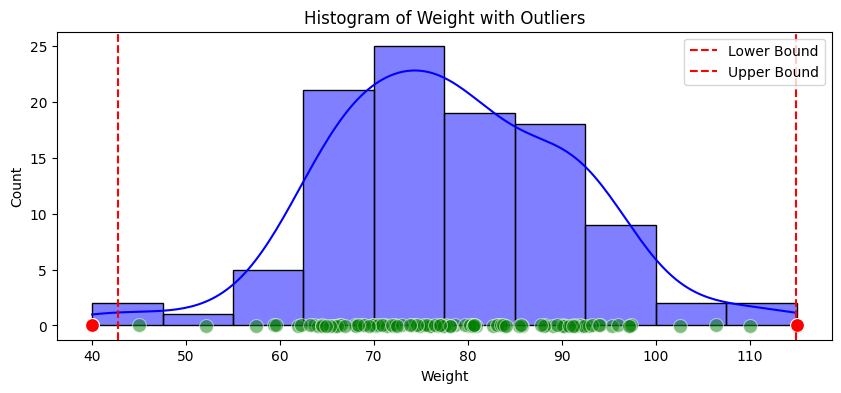

Outliers:
     ID  Height  Weight  BMI
100 NaN     NaN    40.0  NaN
103 NaN     NaN   115.0  NaN


In [8]:
from scipy.stats import median_abs_deviation

# ... (previous code for range, IQR, MAD, and SD plots)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Weight'] < lower_bound) | (data['Weight'] > upper_bound)]

# Adjust the data to add some outliers
data_with_outliers = pd.concat([data, pd.DataFrame({'Weight': [40, 45, 110, 115]})], ignore_index=True)

# Histogram with outlier boundaries and data points
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data_with_outliers['Weight'], bins=10, color="blue", kde=True, alpha=0.5)

# Add data points
y_jitter = np.random.normal(0, 0.01, size=len(data_with_outliers))
sns.scatterplot(x=data_with_outliers['Weight'], y=y_jitter, s=100, color="green", alpha=0.5, marker='o', legend=False)

# Add outlier data points
outliers_with_added = data_with_outliers[(data_with_outliers['Weight'] < lower_bound) | (data_with_outliers['Weight'] > upper_bound)]
y_jitter_outliers = np.random.normal(0, 0.01, size=len(outliers_with_added))
sns.scatterplot(x=outliers_with_added['Weight'], y=y_jitter_outliers, s=100, color="red", alpha=1, marker='o', legend=False)

plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Outliers")
plt.legend()
plt.show()

print("Outliers:")
print(outliers_with_added)

## Conclusión

- Recapitular los conceptos clave cubiertos en el artículo.
- Enfatizar la importancia de comprender las distribuciones de datos cuantitativos para el análisis de datos.